# Effective potentials for spherical and oblate potentials

Figure 7.2 from Chapter 7 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Equipotential contours for an axisymmetric disk described by effective potential
\begin{equation}
  \Phi_{eff}(R,z) = \frac{1}{2}v_0^2\ln\left(R^2 + z^2/q^2\right) + \frac{j_z^2}{2R^2}
\end{equation}
Plot for two cases
 * Spherical potential, $q=1$
 * Oblate potential, $q=0.8$
 
This is the same effective potential we plotted in Figure 6.1

In [10]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [11]:
plotFile = 'Fig7_2.png' 

# graphic aspect ratio = width/height

aspect = 2.2

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Axisymmetric disk effective potential

The effective potential for a test mass of specific angular momentum $j_z$ in the logarithmic potential of
Equation 7.37 is
\begin{equation}
  \Phi_{eff}(R,z) = \frac{1}{2}v_0^2\ln\left(R^2 + z^2/q^2\right) + \frac{j_z^2}{2R^2}
\end{equation}
We will compute this for distances $R$ and $z$ scaled to $R_g=j_z/v_0$, so $v_0=1$ and $j_z=1$ in the
equation above.


In [12]:
def effPhi(R,z,q):
    q2 = q*q
    phi = 0.5*np.log(R*R + z*z/q2) + 0.5/(R*R)
    return phi

## Compute effective potential contours

Compute $\Phi_{eff}$ for R=[0.01..10] and z=[-5..+5] for a spherical potential with $q=1$ and an oblate
potential with $q=0.8$

Contour of $\Phi_{eff}$ are spaced by by $\Delta\Phi_{eff}=0.5$ which is 0.5$v_0^2$ in our dimensionless units.

If you change any of the parameters of the computation, uncomment the print statements to
get guidance on how to set the contour levels and spacing.

In [13]:
# plotting limits

rMin = 0.01 # both rho and Phi infinite at R=0
rMax = 10.0
zMin = -5.0 
zMax =  5.0

# setup the grid in R,z coordinates

numPix = 501
Rg = np.linspace(rMin,rMax,numPix)
zg = np.linspace(zMin,zMax,numPix)
R,z = np.meshgrid(Rg,zg)

# spherical potential

effPhiSphere = effPhi(R,z,1.0)

# oblate potential

effPhiOblate = effPhi(R,z,0.8)

# print(f'\nphi: min={np.min(effPhiOblate)} max={np.max(effPhiOblate)}')

# equipotential contours

phiMin = 0.5
phiMax = 4.5
dphi = 0.5
phiLevels = np.arange(phiMin,phiMax+dphi,dphi)

## Figure 7.2: side by side format

Left Panel: equipotenital contours in steps of 0.5 for a spherical ($q=1$) potential

Right Panel: equipotential contours in steps of 0.5 for an oblate ($q=0.8$) potential

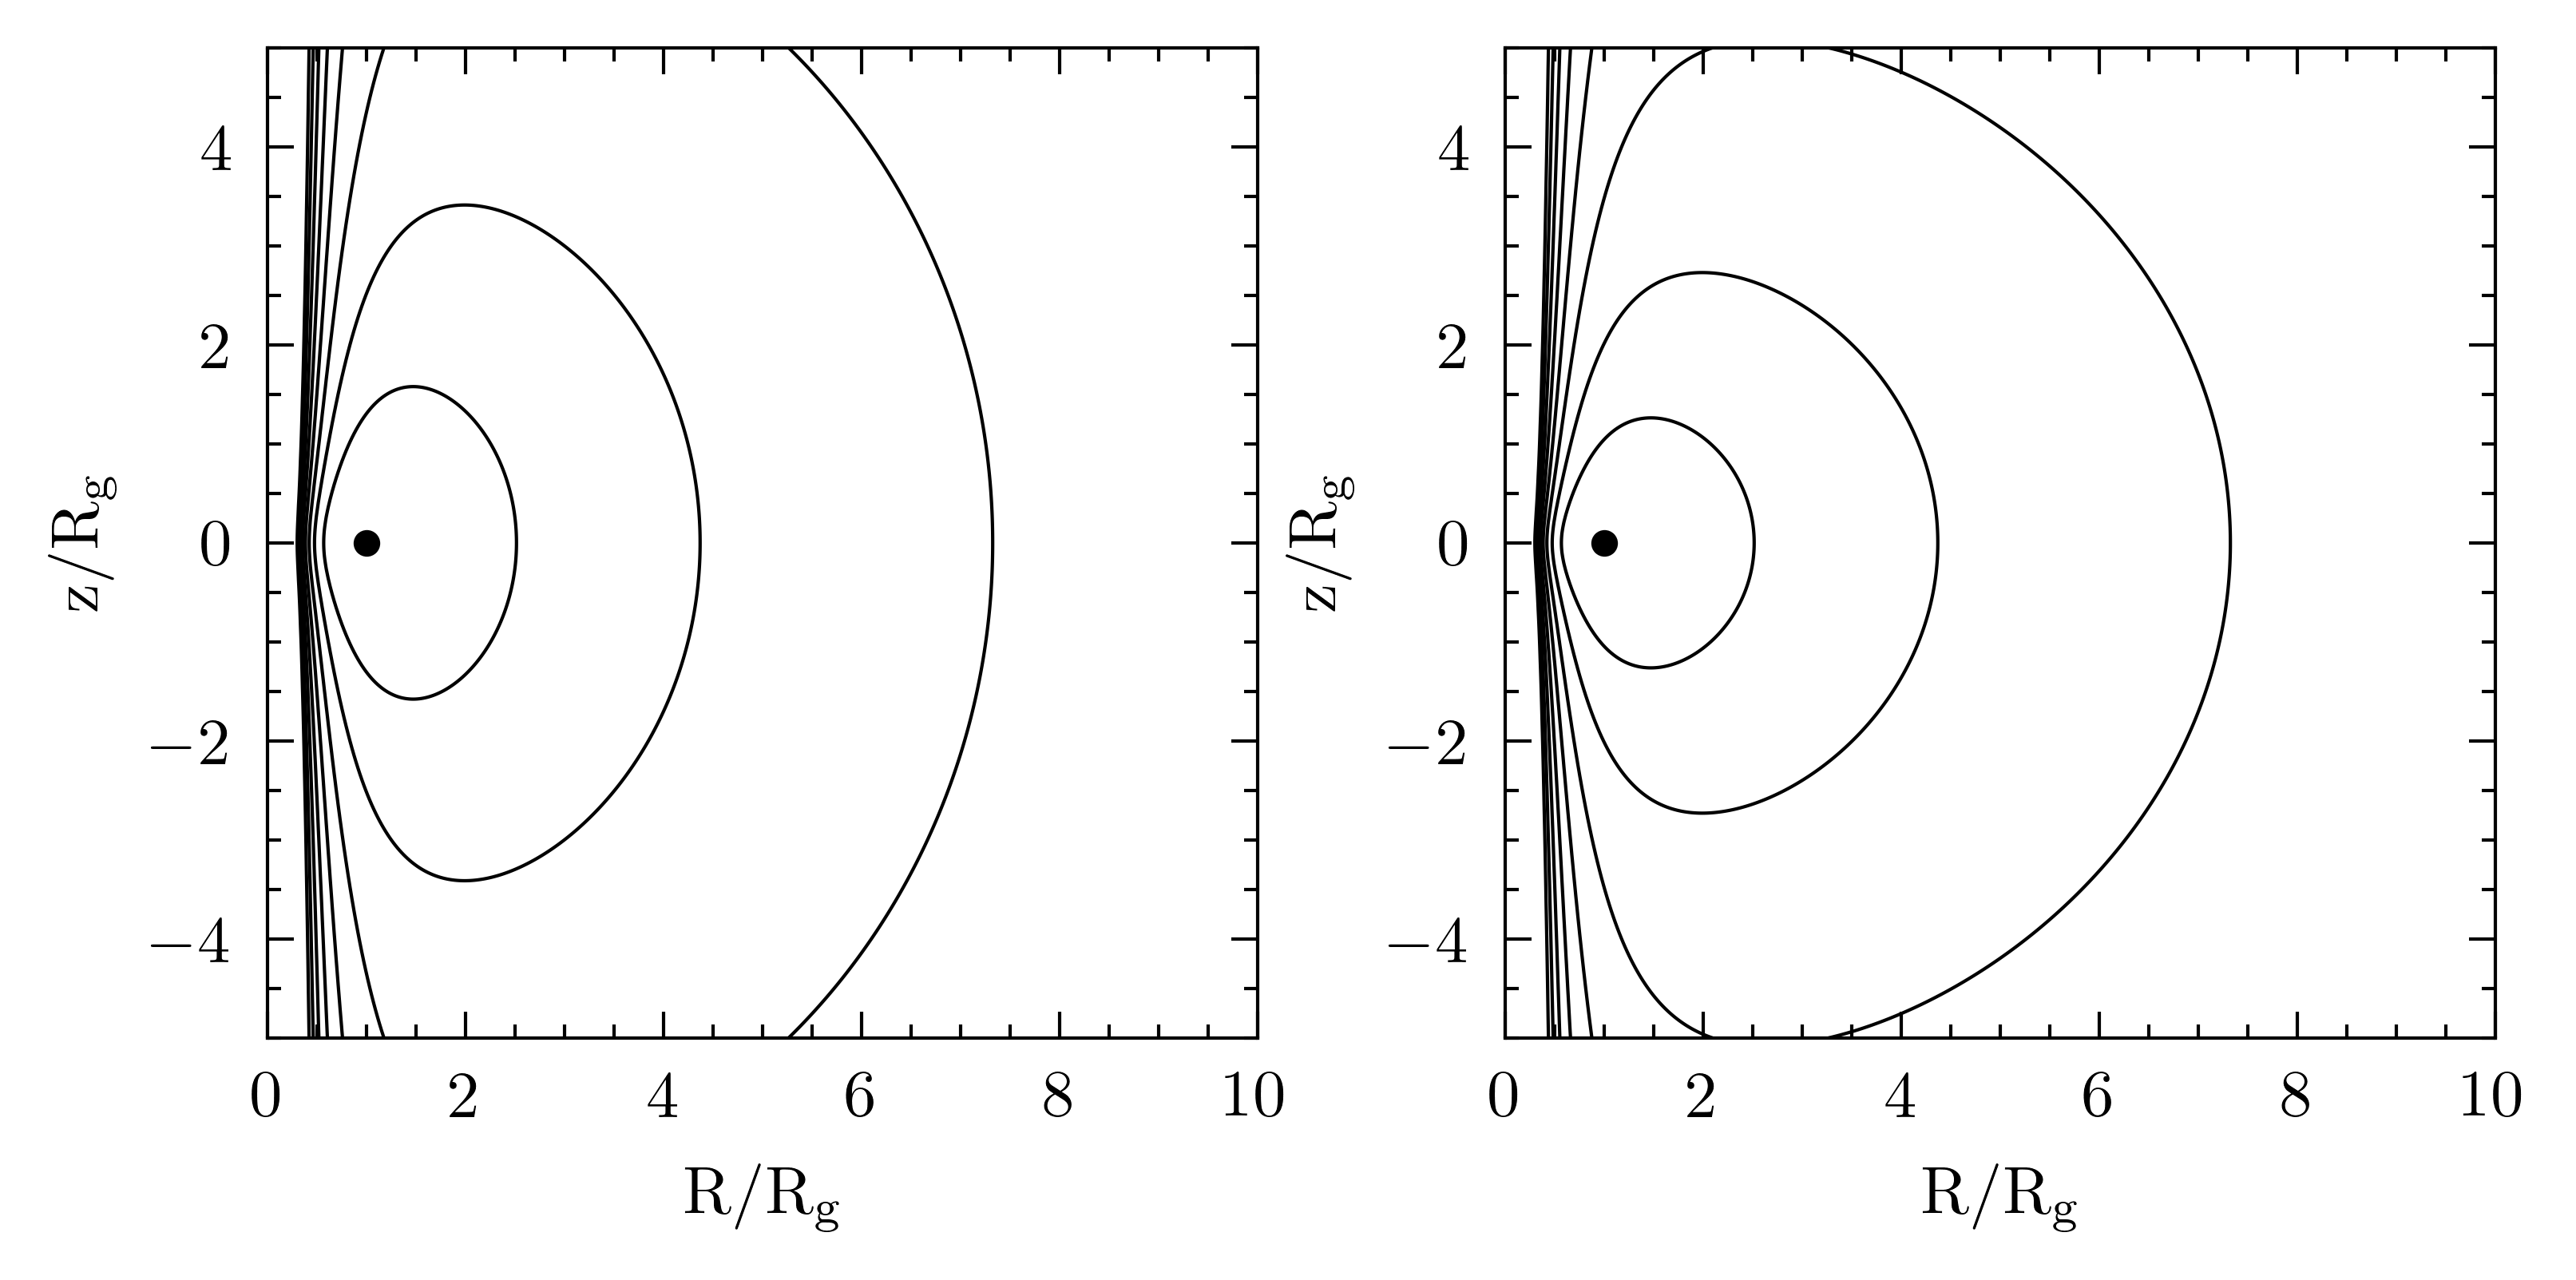

In [14]:
# plotting limits

rMin = 0.0
rMax = 10.0
zMin = -5.0
zMax = 5.0

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)
fig.subplots_adjust(wspace=0.25, hspace=0.0)

# left panel: spherical potential

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax1.set_aspect('equal')

ax1.set_xlim(rMin,rMax)
ax1.xaxis.set_major_locator(MultipleLocator(2))
ax1.xaxis.set_minor_locator(MultipleLocator(0.5))
ax1.set_xlabel(r'R/R$_{\rm g}$',fontsize=axisFontSize)

ax1.set_ylim(zMin,zMax)
ax1.yaxis.set_major_locator(MultipleLocator(2))
ax1.yaxis.set_minor_locator(MultipleLocator(0.5))
ax1.set_ylabel(r'z/R$_{\rm g}$',fontsize=axisFontSize)

cs = ax1.contour(R,z,effPhiSphere,levels=phiLevels,colors=['black'],linestyles='solid',linewidths=0.5)

ax1.plot(1,0,'o',ms=4,mfc='black',mec=None,mew=0.0,zorder=10)

# right panel: oblate potential

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax2.set_aspect('equal')

ax2.set_xlim(rMin,rMax)
ax2.xaxis.set_major_locator(MultipleLocator(2))
ax2.xaxis.set_minor_locator(MultipleLocator(0.5))
ax2.set_xlabel(r'R/R$_{\rm g}$',fontsize=axisFontSize)

ax2.set_ylim(zMin,zMax)
ax2.yaxis.set_major_locator(MultipleLocator(2))
ax2.yaxis.set_minor_locator(MultipleLocator(0.5))
ax2.set_ylabel(r'z/R$_{\rm g}$',fontsize=axisFontSize)

cs = ax2.contour(R,z,effPhiOblate,levels=phiLevels,colors=['black'],linestyles='solid',linewidths=0.5)

ax2.plot(1,0,'o',ms=4,mfc='black',mec=None,mew=0.0,zorder=10)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')